First, we import the `static_FRET_lines` and `dynamic_FRET_line` functions from the FRETlines library. We will also require the different distance distribution models in `distance_distributions`.
We will also require *matplotlib* for plotting.

In [1]:
from FRETlines import static_FRET_line, dynamic_FRET_line
from FRETlines import distance_distributions as dist
from matplotlib import pyplot as plt
%matplotlib inline

**Distance distributions**

Let us construct some distance distributions. This is a normal distribution of distances, centered at 50 Ångstrom with a width of 5 Å.

Text(0, 0.5, 'Probability')

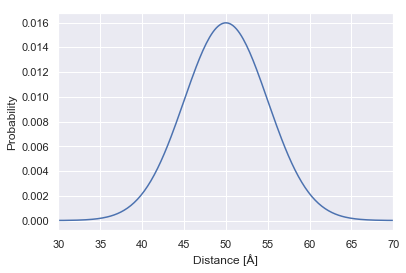

In [3]:
xR = np.linspace(0,200,1000)
p = dist.normal_distribution(xR, 50, 5)
plt.plot(xR,p)
plt.xlim([30,70])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')

This is a non-central chi distribution width a distance between the mean positions of 10 Å and a width parameter of 20 Å.

Text(0, 0.5, 'Probability')

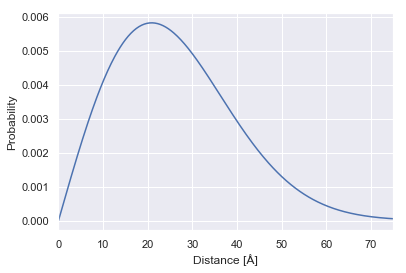

In [4]:
p = dist.chi_distribution(xR,10,20)
plt.plot(xR,p)
plt.xlim([0,75])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')

Moving to polymer models, let's construct the distance distribution of a random coil (or Gaussian chain) with a root-mean-square end-to-end distance of 50 Å.

Text(0, 0.5, 'Probability')

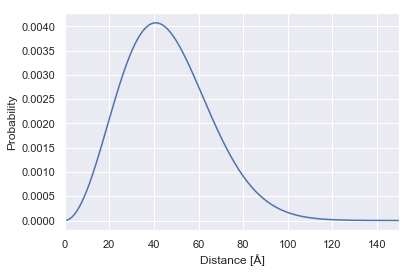

In [8]:
p = dist.gaussian_chain(xR,50)
plt.plot(xR,p)
plt.xlim([0,150])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')

Finally, we consider a worm-like chain with a length of 100 Å and a stiffness of 0.5. The stiffness is defined as the ratio of the persistence length to the total chain length.

Text(0, 0.5, 'Probability')

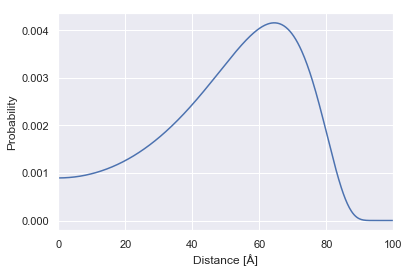

In [11]:
p = dist.worm_like_chain(xR,100,0.5)
plt.plot(xR,p)
plt.xlim([0,100])
plt.xlabel('Distance [Å]')
plt.ylabel('Probability')

**static FRET-lines**

We now show how to construct FRET-lines. To define FRET lines of a distance distribution model, we need to specify which parameter is to be varied and in what range. The standard value for the Förster distance is 50 Å, if not specified otherwise. The standard distribution model is a normal distribution of distances.

Text(0, 0.5, 'tauDA/tauD0')

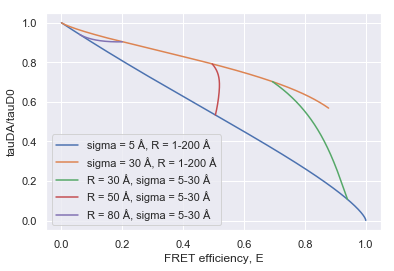

In [21]:
# FRET-line at constant width parameter of 5 Å and varying center distance from 1 to 200 Å:
E, tau = static_FRET_line(variable_parameter=0,param=(50,5),param_range=(1,200))
plt.plot(E,tau,label='sigma = 5 Å, R = 1-200 Å')
# FRET-line at constant width parameter of 30 Å and varying center distance from 1 to 200 Å:
E, tau = static_FRET_line(variable_parameter=0,param=(30,30),param_range=(1,200))
plt.plot(E,tau,label='sigma = 30 Å, R = 1-200 Å')
# FRET-line at constant inter-dye distance of 30 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(30,5),param_range=(5,30))
plt.plot(E,tau,label='R = 30 Å, sigma = 5-30 Å')
# FRET-line at constant inter-dye distance of 50 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(50,5),param_range=(5,30))
plt.plot(E,tau,label='R = 50 Å, sigma = 5-30 Å')
# FRET-line at constant inter-dye distance of 80 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(80,5),param_range=(5,30))
plt.plot(E,tau,label='R = 80 Å, sigma = 5-30 Å')

plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

We can plot the same in the moment representation:

Text(0, 0.5, '(1-E)E_F')

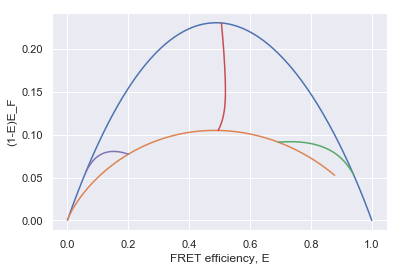

In [57]:
# FRET-line at constant width parameter of 5 Å and varying center distance from 1 to 200 Å:
E, tau = static_FRET_line(variable_parameter=0,param=(50,5),param_range=(1,200),mode='moments')
plt.plot(E,tau,label='sigma = 5 Å, R = 1-200 Å')
# FRET-line at constant width parameter of 30 Å and varying center distance from 1 to 200 Å:
E, tau = static_FRET_line(variable_parameter=0,param=(30,30),param_range=(1,200),mode='moments')
plt.plot(E,tau,label='sigma = 30 Å, R = 1-200 Å')
# FRET-line at constant inter-dye distance of 30 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(30,5),param_range=(5,30),mode='moments')
plt.plot(E,tau,label='R = 30 Å, sigma = 5-30 Å')
# FRET-line at constant inter-dye distance of 50 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(50,5),param_range=(5,30),mode='moments')
plt.plot(E,tau,label='R = 50 Å, sigma = 5-30 Å')
# FRET-line at constant inter-dye distance of 80 Å and varying width parameter from 5 to 30 Å:
E, tau = static_FRET_line(variable_parameter=1,param=(80,5),param_range=(5,30),mode='moments')
plt.plot(E,tau,label='R = 80 Å, sigma = 5-30 Å')

#plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('(1-E)E_F')

Let's compare the FRET-lines for normal and chi distributions at a distribution width of 20 Å. To choose the distribution, we pass the distance distribution from the `distance_distribution` module as an input:

Text(0, 0.5, 'tauDA/tauD0')

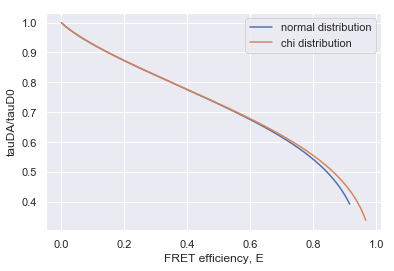

In [26]:
# FRET-lines of normal and chi distribution at sigma = 20 Å
E, tau = static_FRET_line(model=dist.chi_distribution, variable_parameter=0,param=(50,20),param_range=(1,200))
plt.plot(E,tau,label='normal distribution')
E, tau = static_FRET_line(model=dist.normal_distribution, variable_parameter=0,param=(50,20),param_range=(1,200))
plt.plot(E,tau,label='chi distribution')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

For the random coil (or Gaussian chain) model, only a single FRET-line can be constructed, obtained by varying the root-mean-square end-to-end distance.

Text(0, 0.5, 'tauDA/tauD0')

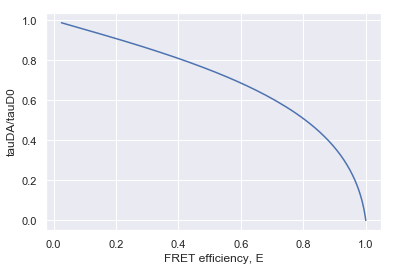

In [29]:
E, tau = static_FRET_line(model=dist.gaussian_chain,param_range=(1,1000))
plt.plot(E,tau)
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

For the worm-like chain mode, we can construct FRET-lines at constant stiffness kappa and variable chain length, or at constant chain length and variable stiffness:

Text(0, 0.5, 'tauDA/tauD0')

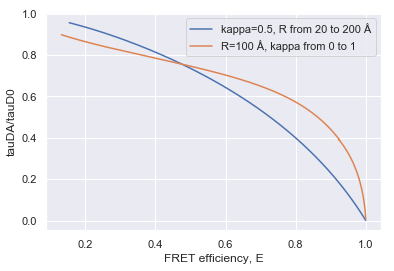

In [45]:
E, tau = static_FRET_line(model=dist.worm_like_chain,variable_parameter=0,param=(100,0.5),param_range=(20,200))
plt.plot(E,tau,label='kappa=0.5, R from 20 to 200 Å')
E, tau = static_FRET_line(model=dist.worm_like_chain,variable_parameter=1,param=(100,0.5),param_range=(0.01,0.99))
plt.plot(E,tau,label='R=100 Å, kappa from 0 to 1')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

**dynamic FRET-lines**

Dynamic FRET-lines are constructed between different points of static FRET-lines and describe the mixing between the two connected species. The start and end points can originate from different distance distribution models. It is e.g. possible to construct a dynamic FRET-lines between a normal distribution and a worm-like chain model.

First, we construct ordinary dynamic FRET-lines for normal distance distributions with a width of 5 Å for the start and end points with center distances of 40 Å and 60 Å.

Text(0, 0.5, 'tauDA/tauD0')

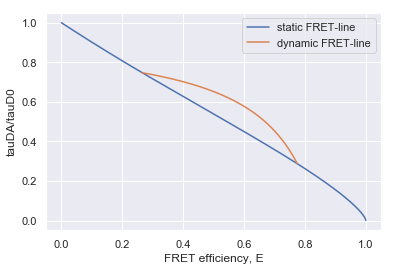

In [50]:
E,tau = static_FRET_line(model=dist.normal_distribution,variable_parameter=0,param_range=(1,200))
plt.plot(E,tau,label='static FRET-line')
E,tau = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(40,5),param2=(60,5))
plt.plot(E,tau,label='dynamic FRET-line')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

And in the moment representation:

Text(0, 0.5, '(1-E)E_F')

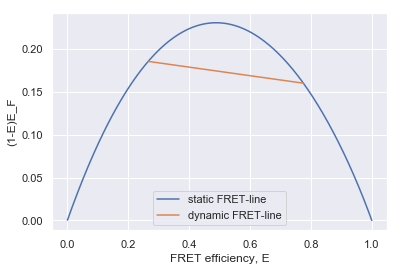

In [56]:
E,tau = static_FRET_line(model=dist.normal_distribution,variable_parameter=0,param_range=(1,200),mode='moments')
plt.plot(E,tau,label='static FRET-line')
E,tau = dynamic_FRET_line(model1=dist.normal_distribution,model2=dist.normal_distribution,param1=(40,5),param2=(60,5),mode='moments')
plt.plot(E,tau,label='dynamic FRET-line')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('(1-E)E_F')

Finally, we construct a mixed dynamic FRET-line between chi-distribution with a center distance of 50 Å and a width of 5 Å, and a worm-like chain of length 100 Å and stiffness of 0.75:

Text(0, 0.5, 'tauDA/tauD0')

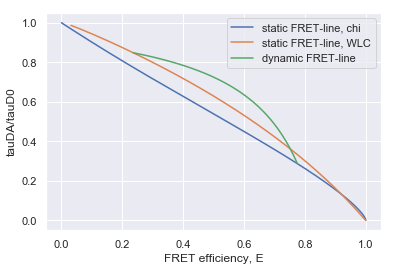

In [58]:
E,tau = static_FRET_line(model=dist.chi_distribution, param=(50,5))
plt.plot(E,tau,label='static FRET-line, chi')
E,tau = static_FRET_line(model=dist.worm_like_chain, param=(100,0.75))
plt.plot(E,tau,label='static FRET-line, WLC')
E,tau = dynamic_FRET_line(model1=dist.chi_distribution, model2=dist.worm_like_chain,param1=(40,5),param2=(100,0.75))
plt.plot(E,tau,label='dynamic FRET-line')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

And in the moment representation:

Text(0, 0.5, 'tauDA/tauD0')

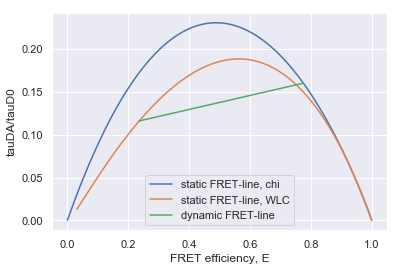

In [61]:
E,tau = static_FRET_line(model=dist.chi_distribution, param=(50,5), mode='moments')
plt.plot(E,tau,label='static FRET-line, chi')
E,tau = static_FRET_line(model=dist.worm_like_chain, param=(100,0.75), mode='moments')
plt.plot(E,tau,label='static FRET-line, WLC')
E,tau = dynamic_FRET_line(model1=dist.chi_distribution, model2=dist.worm_like_chain,param1=(40,5),param2=(100,0.75), mode='moments')
plt.plot(E,tau,label='dynamic FRET-line')
plt.legend()
plt.xlabel('FRET efficiency, E')
plt.ylabel('tauDA/tauD0')

**Saving of FRET-lines**

Generated FRET-lines can be saved to csv files by:

In [98]:
import numpy as np

E,tau = static_FRET_line(model=dist.chi_distribution, param=(50,5))

np.savetxt('FRETline.txt',np.array([E,tau]).T,delimiter='\t')